## Why the Fermi-Dirac Distribution Matters  

In a system of **non-interacting fermions** (e.g., electrons in a metal), the  
probability that an energy state \(E\) is occupied at temperature \(T\) is  

$
f(E) \;=\; \frac{1}{\exp\!\bigl[(E - E_F)/(k_B\,T)\bigr] + 1},
$

where  

| Symbol | Meaning |
| :- | :- |
| $E_F$ | Fermi energy (energy where \(f = 0.5\) at \(T = 0\) K) |
| $k_B$ | Boltzmann constant $\ \ 8.617*10^{-5} \ \ \text{eV K}^{-1}$ |
| $T$ | Absolute temperature (K) |

Key limits  

* **$T \to 0$**: step function – all states below $E_F$ filled.  
* **$T \gt 0$**: step smears; occupancy above $E_F$ becomes non-zero.

> We will plot $f(E)$ for several temperatures and inspect velocity & density implications.


Fermi-Dirac Statistic Distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The Ideal Case with exact values

In [ ]:
E = np.linspace(-1, 3, 50)[:, None, None, None]
E = np.broadcast_to(E, (50, 50, 50, 50))  # Broadcasting to create a 4D array
k_b = 8.617333262145e-5  # eV/K
T = np.linspace(0, 1000, 10)  # Temperature in Kelvin
kT_values = k_b * T  # Convert to eV

# Fermi-Dirac distribution function
# f(E) = 1 / (exp((E - E_F)/(kT)) + 1)
# where E_F is the Fermi energy, kT is the thermal energy at temperature T

h_bar = 6.626e-34 / (2 * np.pi)  # Reduced Planck's constant in J.s
h_bar = h_bar / 1.6e-19  # Convert to eV

k_x = k_y = k_z = np.linspace(-1, 1, 50)
k_x, k_y, k_z = np.meshgrid(k_x, k_y, k_z)

k = np.sqrt(k_x**2 + k_y**2 + k_z**2)  # Magnitude of the wave vector

m_e = 9.1e-31  # Electron mass in kg


E_F = ((h_bar * k)**2) / (2 * m_e)  # Fermi energy in eV


def fermi_dirac(E, E_F, kT):
    return 1 / (np.exp((E - E_F[None, :, :, :]) / kT) + 1)


def fermi_dirac_velocity(k):
    v_f = (h_bar * k)/m_e  # Velocity in m/s
    return v_f


C:\Users\vineet\AppData\Local\Temp\ipykernel_16340\3262020997.py:6: RuntimeWarning: divide by zero encountered in divide
  f_E = 1 / (np.exp((E - E_F[None, :, :, :])/kT) + 1)


Temperature (eV): 0.00, Max: 1.00, Min: 0.00
Temperature (eV): 0.01, Max: 1.00, Min: 0.00
Temperature (eV): 0.02, Max: 1.00, Min: 0.00
Temperature (eV): 0.03, Max: 1.00, Min: 0.00
Temperature (eV): 0.04, Max: 1.00, Min: 0.00
Temperature (eV): 0.05, Max: 1.00, Min: 0.00
Temperature (eV): 0.06, Max: 1.00, Min: 0.00
Temperature (eV): 0.07, Max: 1.00, Min: 0.00
Temperature (eV): 0.08, Max: 1.00, Min: 0.00
Temperature (eV): 0.09, Max: 1.00, Min: 0.00


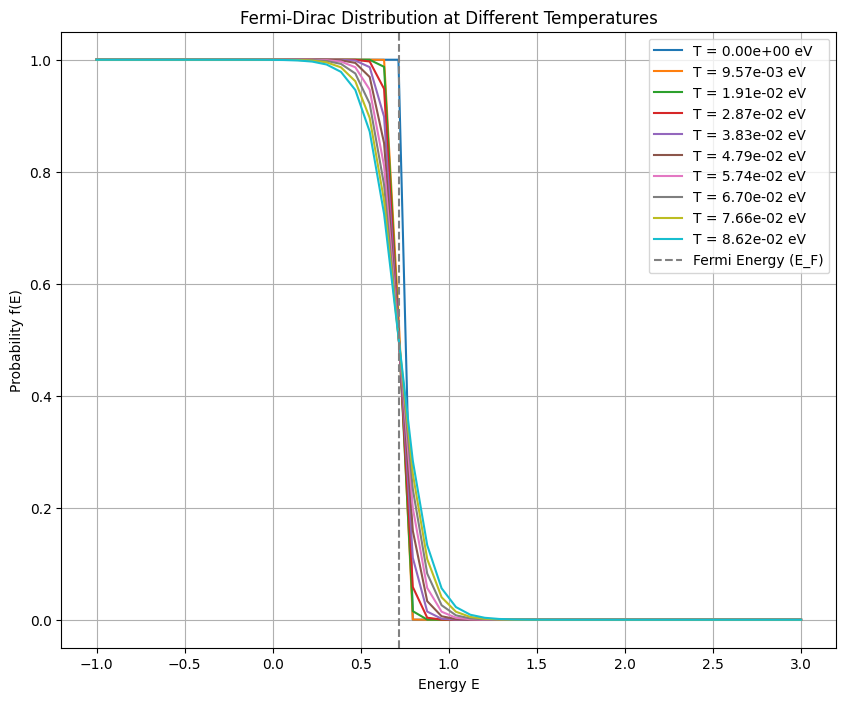

In [ ]:
plt.figure(figsize=(10, 8))

# Plot Fermi-Dirac distribution for different temperatures

for kT in kT_values:
    f_E = 1 / (np.exp((E - E_F[None, :, :, :])/kT) + 1)
    plt.plot(E[:, 0, 0, 0], f_E[:, 0, 0, 0], label=f"T = {kT:.2e} eV")
    print(f"Temperature (eV): {kT:.2f}, Max: {np.max(f_E):.2f}, Min: {np.min(f_E):.2f}")
plt.axvline(E_F[0,0,0], color='gray', linestyle='--', label='Fermi Energy (E_F)')
plt.xlabel('Energy E')
plt.ylabel('Probability f(E)')
plt.title('Fermi-Dirac Distribution at Different Temperatures')
plt.legend()
plt.grid(True)
plt.show()

The Ideal Case with Ideal Values (Constants equal to 1)

C:\Users\vineet\AppData\Local\Temp\ipykernel_16340\952967413.py:33: RuntimeWarning: divide by zero encountered in divide
  f_E = 1 / (np.exp((E - E_F[None, :, :, :]) / kT) + 1)


Temperature (eV): 0.00, Max: 1.00, Min: 0.00
Temperature (eV): 0.10, Max: 1.00, Min: 0.00
Temperature (eV): 0.20, Max: 1.00, Min: 0.00
Temperature (eV): 0.30, Max: 1.00, Min: 0.00
Temperature (eV): 0.40, Max: 1.00, Min: 0.00
Temperature (eV): 0.50, Max: 0.99, Min: 0.00
Temperature (eV): 0.60, Max: 0.98, Min: 0.01
Temperature (eV): 0.70, Max: 0.97, Min: 0.01
Temperature (eV): 0.80, Max: 0.96, Min: 0.02
Temperature (eV): 0.90, Max: 0.94, Min: 0.03
Temperature (eV): 1.00, Max: 0.92, Min: 0.05
Temperature (eV): 1.10, Max: 0.91, Min: 0.06
Temperature (eV): 1.20, Max: 0.89, Min: 0.08
Temperature (eV): 1.30, Max: 0.87, Min: 0.09
Temperature (eV): 1.40, Max: 0.86, Min: 0.11
Temperature (eV): 1.50, Max: 0.84, Min: 0.12
Temperature (eV): 1.60, Max: 0.83, Min: 0.13
Temperature (eV): 1.70, Max: 0.81, Min: 0.15
Temperature (eV): 1.80, Max: 0.80, Min: 0.16
Temperature (eV): 1.90, Max: 0.79, Min: 0.17
Temperature (eV): 2.00, Max: 0.78, Min: 0.18


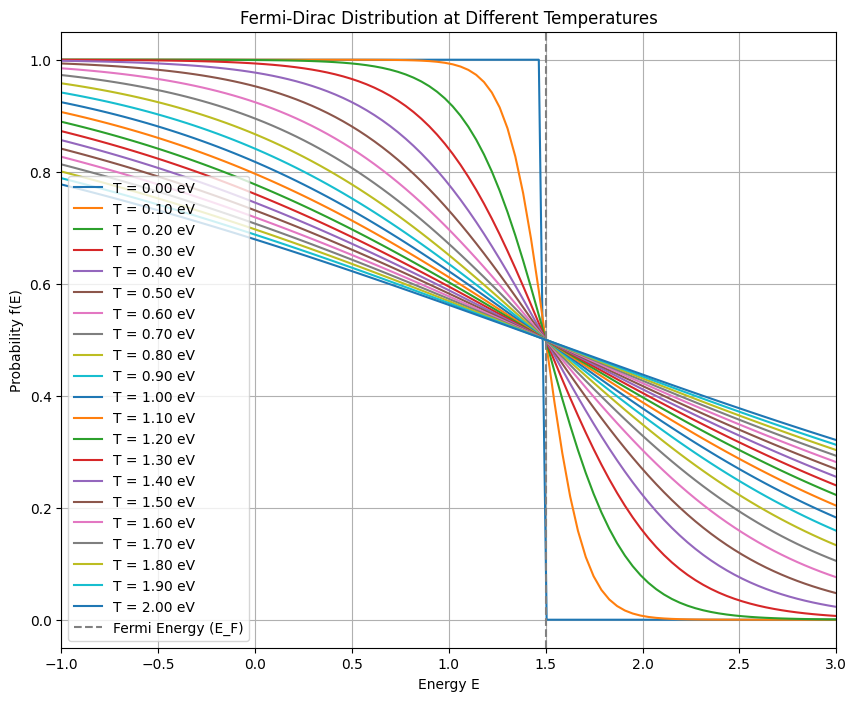

In [ ]:
E = np.linspace(-1, 3, 100)[:, None, None, None]
E = np.broadcast_to(E, (100, 100, 100, 100))  # Broadcasting to create a 4D array
kT_values = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])  # Example kT values in eV

# Fermi-Dirac distribution function
# f(E) = 1 / (exp((E - E_F)/(kT)) + 1)
# where E_F is the Fermi energy, kT is the thermal energy at temperature T

h_bar = 1

k_x = k_y = k_z = np.linspace(-1, 1, 100)
k_x, k_y, k_z = np.meshgrid(k_x, k_y, k_z)

k = np.sqrt(k_x**2 + k_y**2 + k_z**2)  # Magnitude of the wave vector

m_e = 1

E_F = ((h_bar * k)**2) / (2 * m_e)  # Fermi energy in eV

def fermi_dirac(E, E_F, kT):
    return 1 / (np.exp((E - E_F[None, :, :, :]) / kT) + 1)

def fermi_dirac_velocity(k):
    v_f = (h_bar * k) / m_e  # Velocity in m/s
    return v_f

plt.figure(figsize=(10, 8))

# Plot Fermi-Dirac distribution for different temperatures

for kT in kT_values:

    f_E = 1 / (np.exp((E - E_F[None, :, :, :]) / kT) + 1)
    plt.plot(E[:, 0, 0, 0], f_E[:, 0, 0, 0], label=f"T = {kT:.2f} eV")
    print(f"Temperature (eV): {kT:.2f}, Max: {np.max(f_E):.2f}, Min: {np.min(f_E):.2f}")

plt.axvline(E_F[0,0,0], color='gray', linestyle='--', label='Fermi Energy (E_F)')
plt.xlabel('Energy E')
plt.ylabel('Probability f(E)')
plt.xlim(-1, 3)
plt.ylim(-1, 1)
plt.title('Fermi-Dirac Distribution at Different Temperatures')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()


Ideal case without Fermi-Sphere with Ideal values (constant equal to 1)

C:\Users\vineet\AppData\Local\Temp\ipykernel_16340\1962694540.py:11: RuntimeWarning: divide by zero encountered in divide
  return 1 / (np.exp((E - E_F) / kT) + 1)


Temperature (eV): 0.00, Max: 1.00, Min: 0.00
Temperature (eV): 0.10, Max: 1.00, Min: 0.01
Temperature (eV): 0.20, Max: 1.00, Min: 0.08
Temperature (eV): 0.30, Max: 0.99, Min: 0.16
Temperature (eV): 0.40, Max: 0.98, Min: 0.22
Temperature (eV): 0.50, Max: 0.95, Min: 0.27


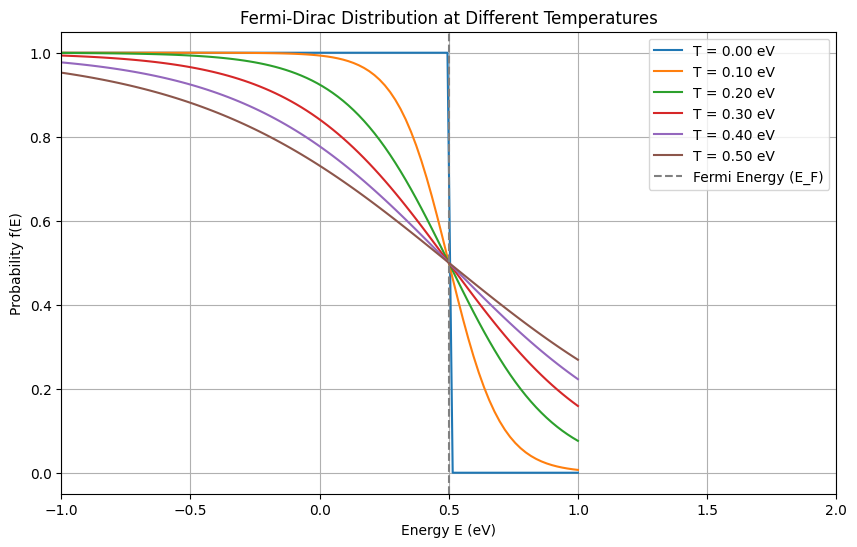

In [ ]:
E = np.linspace(-1, 1, 100)
kT_values = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])

'''
Fermi-Dirac Distribution Function
f(E) = 1 / (exp((E - E_F)/(kT)) + 1)
where E_F is the Fermi energy, kT is the thermal energy at temperature T
'''

def fermi_dirac(E, E_F, kT):
    return 1 / (np.exp((E - E_F) / kT) + 1)

plt.figure(figsize=(10, 6))

# Plot Fermi-Dirac distribution for different temperatures

for kT in kT_values:
    E_F = 0.5  # Example Fermi energy
    f_E = fermi_dirac(E, E_F, kT)
    plt.plot(E, f_E, label=f"T = {kT:.2f} eV")
    print(f"Temperature (eV): {kT:.2f}, Max: {np.max(f_E):.2f}, Min: {np.min(f_E):.2f}")

plt.axvline(0.5, color='gray', linestyle='--', label='Fermi Energy (E_F)')
plt.xlabel('Energy E (eV)')
plt.ylabel('Probability f(E)')
plt.xlim(-1, 2)
plt.ylim(-1, 1)
plt.title('Fermi-Dirac Distribution at Different Temperatures')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

Fermi-Sphere and radius and other

1. Temperature (eV): 0.000, Max: 1.000, Min: 0.000
2. Temperature (eV): 0.001, Max: 1.000, Min: 0.000
3. Temperature (eV): 0.002, Max: 1.000, Min: 0.000
4. Temperature (eV): 0.003, Max: 1.000, Min: 0.000
5. Temperature (eV): 0.003, Max: 1.000, Min: 0.000
6. Temperature (eV): 0.004, Max: 1.000, Min: 0.000
7. Temperature (eV): 0.005, Max: 1.000, Min: 0.000
8. Temperature (eV): 0.006, Max: 1.000, Min: 0.000
9. Temperature (eV): 0.007, Max: 1.000, Min: 0.000
10. Temperature (eV): 0.008, Max: 1.000, Min: 0.000
11. Temperature (eV): 0.009, Max: 1.000, Min: 0.000
12. Temperature (eV): 0.010, Max: 1.000, Min: 0.000
13. Temperature (eV): 0.010, Max: 1.000, Min: 0.000
14. Temperature (eV): 0.011, Max: 1.000, Min: 0.000
15. Temperature (eV): 0.012, Max: 1.000, Min: 0.000
16. Temperature (eV): 0.013, Max: 1.000, Min: 0.000
17. Temperature (eV): 0.014, Max: 1.000, Min: 0.000
18. Temperature (eV): 0.015, Max: 1.000, Min: 0.000
19. Temperature (eV): 0.016, Max: 1.000, Min: 0.000
20. Temperature (eV):

C:\Users\vineet\AppData\Local\Temp\ipykernel_16340\2675207362.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


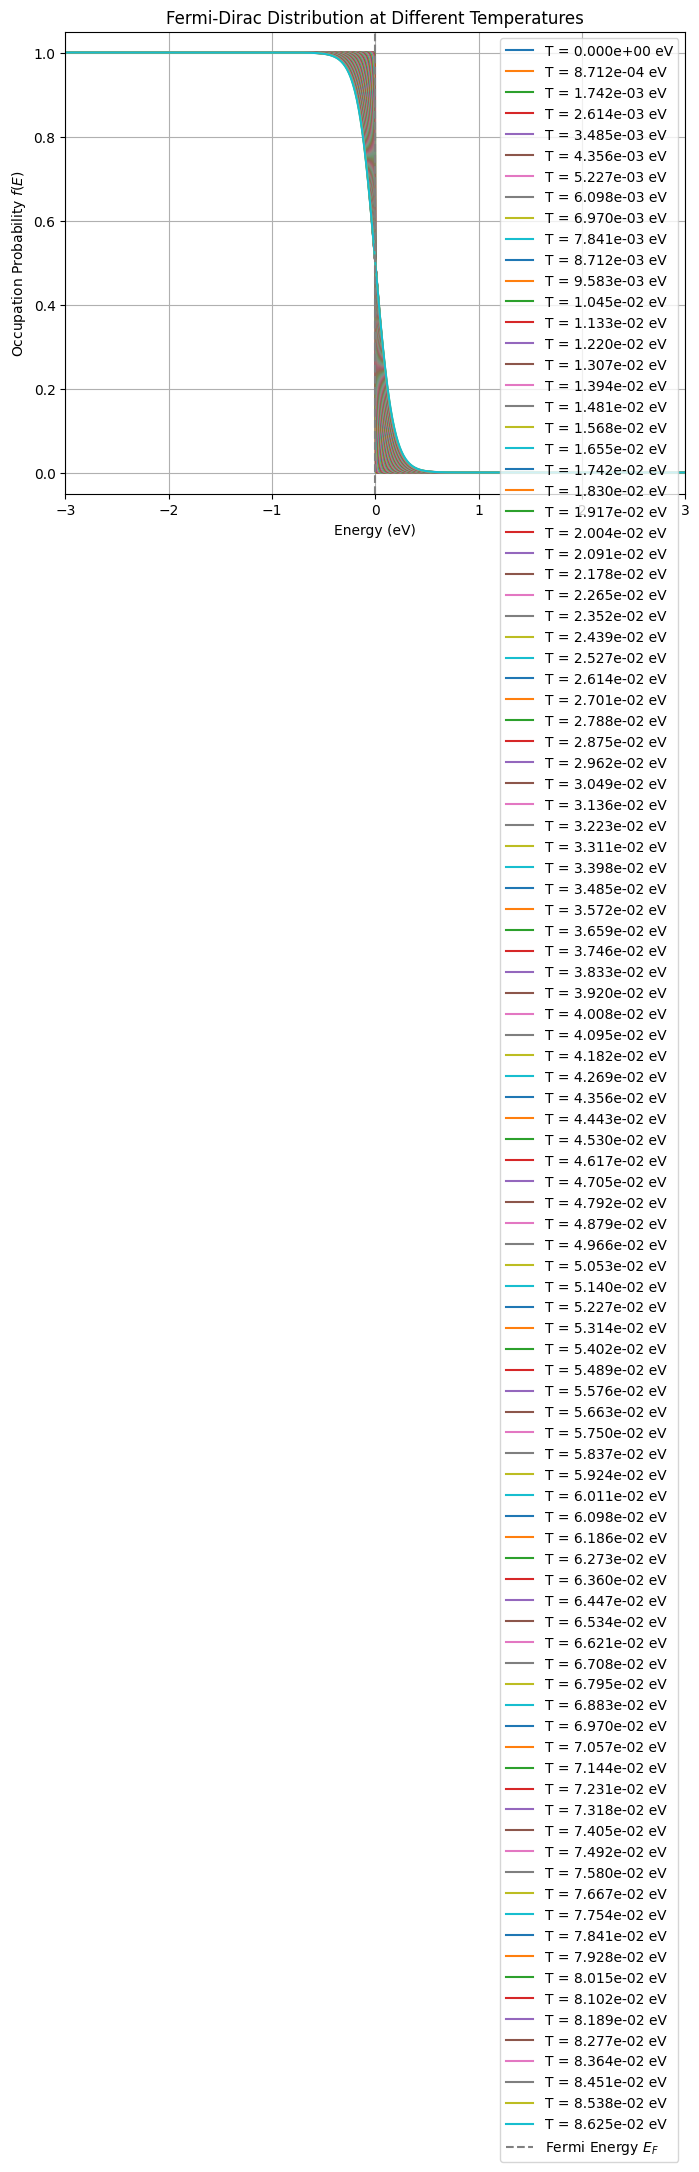

In [ ]:
# Constants

k_b = 1.38e-23            # Boltzmann Constant J/K
q = 1.6e-19               # Electron charge C
h = 6.626e-34             # Planck's Constant J/s
h_bar = h / (2 * np.pi)   # Reduced Planck's Constant J/s
m_e = 9.1e-31             # Electron Mass kg

# Energy grid (in eV)

E = np.linspace(-3, 3, 1000) # more points for smoothness

# Wave-vector grid

k_vals = np.linspace(-2 * np.pi, 2 * np.pi, 50)

k_x, k_y, k_z = np.meshgrid(k_vals, k_vals, k_vals)

k_mag = np.sqrt(k_x**2 + k_y**2 + k_z**2)

# Compute Fermi Energy from wave-vector

v_f = (h_bar * k_mag) / m_e

E_F_grid = (1/2) * m_e * v_f**2 / q  # Convert to eV

# Temperature grid (in Kelvin)

T = np.linspace(0, 1000, 100)

kT_values = (k_b * T) / q  # Convert to eV

# Fermi-Dirac Distribution Function

def fermi_dirac(E, E_F, kT):
  with np.errstate(over = 'ignore', divide = 'ignore'):
    exponent = (E[:, None, None, None] - E_F[None, :, :, :]) / kT
    f_E = 1 / (np.exp(exponent) + 1)
  return f_E

# Plot Set-Up

plt.figure(figsize = (8, 6))
for i, kT in enumerate(kT_values, start = 1):
  f_E = fermi_dirac(E, E_F_grid, kT)
  f_slice = f_E[:, 0, 0, 0]
  plt.plot(E, f_slice, label = f"T = {kT:.3e} eV")
  print(f"{i}. Temperature (eV): {kT:.3f}, Max: {np.max(f_E):.3f}, Min: {np.min(f_E):.3f}")


E_F_center = E_F_grid[0, 0, 0]
plt.axvline(E_F_center, color = 'gray', linestyle = '--', label = 'Fermi Energy $E_F$')
plt.xlabel('Energy (eV)')
plt.ylabel('Occupation Probability $f(E)$')
plt.title('Fermi-Dirac Distribution at Different Temperatures')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.xlim(-3, 3)
plt.tight_layout()
plt.show()


#### References  
1. N. W. Ashcroft & N. D. Mermin, *Solid State Physics*.  
2. Charles Kittel, *Introduction to Solid State Physics*.